In [1]:
# Import necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset:

In [6]:
df = pd.read_csv("chemicals-in-cosmetics-.csv", index_col = 'index')
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [3]:
def open_object_dtype(s):
    dtypes = set()
    # YOUR CODE HERE
    for i in df[s].items():
        dtypes.add(type(i[1]))
    return dtypes
for column in df.columns:
    print(open_object_dtype(column))
df.dtypes

{<class 'int'>}
{<class 'str'>}
{<class 'float'>}
{<class 'str'>, <class 'float'>}
{<class 'int'>}
{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'int'>}
{<class 'str'>}
{<class 'int'>}
{<class 'str'>}
{<class 'int'>}
{<class 'str'>, <class 'float'>}
{<class 'int'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'int'>}


CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

In [7]:

df.dtypes

CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

Có vẻ có một số cột ngày/tháng (VD: InitialDateReported) đúng ra phải có type là datetime nhưng lại ở type object, ta sẽ chuyển các cột này thành type datetime.

In [8]:
def to_datetime(column):
    df[column] = pd.to_datetime(df[column])
to_datetime('InitialDateReported')
to_datetime('MostRecentDateReported')
to_datetime('DiscontinuedDate')
to_datetime('ChemicalCreatedAt')
to_datetime('ChemicalUpdatedAt')
to_datetime('ChemicalDateRemoved')

Phần trăm giá trị nan ở các cột numerical:

In [9]:
df = df.replace(' ', np.nan) #return values to original
def nan_percentage(column):
    print('Percentage of empty value in column ' + column + ':', df[column].isnull().sum() / len(df[column]))
nan_percentage('CSFId')
nan_percentage('CompanyId')
nan_percentage('PrimaryCategoryId')
nan_percentage('SubCategoryId')
nan_percentage('CasId')
nan_percentage('ChemicalId')
nan_percentage('ChemicalCount')

Percentage of empty value in column CSFId: 0.2967331011916219
Percentage of empty value in column CompanyId: 0.0
Percentage of empty value in column PrimaryCategoryId: 0.0
Percentage of empty value in column SubCategoryId: 0.0
Percentage of empty value in column CasId: 0.0
Percentage of empty value in column ChemicalId: 0.0
Percentage of empty value in column ChemicalCount: 0.0


Gần 30% các giá trị ở cột CSFId có giá trị nan. Cột này tuy theo miêu tả của dataset có ý nghĩa để đánh số cho cột CSF ('Cosmetic Safety Factor', là một thang đo độ an toàn của 1 chất hóa học), nhưng thực tế trong dataset thì cột CSF lại dùng để phân loại các loại hay màu khác nhau của 1 sản phẩm (?). Vì vậy, người viết đề xuất đổi tên cột CSF và CSFId lần lượt thành Type và TypeId. 

In [10]:
df.rename(columns = {'CSF':'Type', 'CSFId':'TypeId'}, inplace = True)
df.head()

,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


Rất may là các cột numeric đều có mục đích định danh, nên việc xem xét min/max của các giá trị trong các cột này là không cần thiết :v. 

## Câu 2: Các hãng sản xuất mỹ phẩm có sản phẩm chứa nhiều hóa chất?

In [14]:
chemical_count = df['ChemicalCount'].value_counts().to_frame('counts').head(10)
chemical_count

,counts
1,87132
2,21133
3,3515
4,1437
0,857
5,105
8,41
7,36
6,33
9,9


<AxesSubplot:>

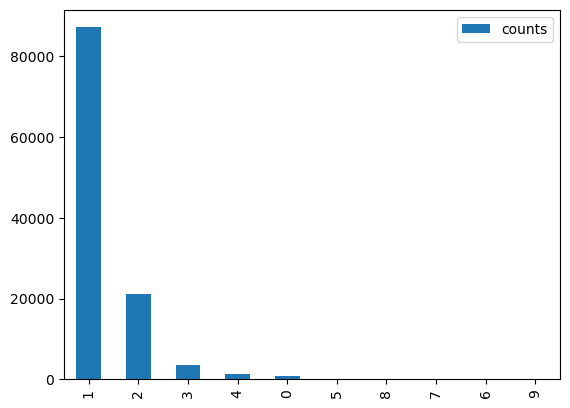

In [28]:
chemical_count.plot.bar()

Có thể thấy đại đa số các sản phẩm mỹ phẩm có từ 4 chất hóa học trở xuống, với phần lớn trong số đó có thành phần chứa 1 chất hóa học.

Tiếp theo chúng ta sẽ xem thử thông tin của các sản phẩm có từ 5 chất hóa học trở lên, do chúng ta muốn biết những sản phẩm nào có chứa nhiều chất hóa học, và những công ty nào có thói quen sử dụng nhiều chất hóa học trong sản phẩm của mình (để né :v)

In [43]:
# Products with 9 chemicals in its ingredient
print(df[df['ChemicalCount'] == 9]['CompanyName'].value_counts())
df[df['ChemicalCount'] == 9]

Regis Corporation    9
Name: CompanyName, dtype: int64


,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,33796,"1,4-Dioxane",2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-06-1,33797,Acrylamide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33798,Arsenic (inorganic arsenic compounds),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,33799,Dichloroacetic acid,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,33800,Ethylene oxide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,33801,Formaldehyde (gas),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,33802,Lead,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33803,Cocamide diethanolamine (DEA),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,107-21-1,33804,Ethylene glycol,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9


In [44]:
# Products with 8 chemicals in its ingredient
print(df[df['ChemicalCount'] == 8]['CompanyName'].value_counts())
df[df['ChemicalCount'] == 8]

Regis Corporation    41
Name: CompanyName, dtype: int64


,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
15654,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,123-91-1,6507,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15655,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,75-07-0,6508,Acetaldehyde,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15656,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,71-43-2,6509,Benzene,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15657,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,100-44-7,6510,Benzyl chloride,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15658,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,75-21-8,6511,Ethylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15659,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,75-09-2,6512,Dichloromethane (Methylene chloride),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,8
15660,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,62-75-9,6513,N-Nitrosodimethylamine,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15661,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,75-56-9,6514,Propylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15662,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),21,...,123-91-1,6988,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-13,2014-02-06,NaT,8


In [45]:
# Products with 7 chemicals in its ingredient
print(df[df['ChemicalCount'] == 7]['CompanyName'].value_counts())
df[df['ChemicalCount'] == 7]

Regis Corporation    36
Name: CompanyName, dtype: int64


,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
15612,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,6479,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15613,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,6480,Arsenic (inorganic arsenic compounds),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15614,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,6481,Dichloroacetic acid,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15615,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,6482,Ethylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15616,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,6483,Formaldehyde (gas),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15617,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,6484,Lead,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15618,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-09-2,6485,Dichloromethane (Methylene chloride),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15619,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,6591,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,7
15620,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,6592,Arsenic (inorganic arsenic compounds),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,7


In [46]:
# Products with 6 chemicals in its ingredient
print(df[df['ChemicalCount'] == 6]['CompanyName'].value_counts())
df[df['ChemicalCount'] == 6]

Palladio Beauty Group    24
Cosmopharm Ltd.           9
Name: CompanyName, dtype: int64


,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
111869,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,14807-96-6,66664,Talc,2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111870,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,NaN,66665,"Silica, crystalline (airborne particles of res...",2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111871,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,12001-26-2,66672,Mica,2019-12-30,2020-01-02,NaT,2019-12-31,2019-12-31,NaT,6
111872,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,NaN,66679,"Mineral oils, untreated and mildly treated",2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111873,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,90045-36-6,66680,Ginkgo biloba extract,2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111874,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,13463-67-7,66681,Titanium dioxide,2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111875,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,14807-96-6,66664,Talc,2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111876,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,NaN,66665,"Silica, crystalline (airborne particles of res...",2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111877,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),172,...,12001-26-2,66672,Mica,2019-12-30,2020-01-02,NaT,2019-12-31,2019-12-31,NaT,6


In [47]:
# Products with 5 chemicals in its ingredient
print(df[df['ChemicalCount'] == 5]['CompanyName'].value_counts())
df[df['ChemicalCount'] == 5]

Palladio Beauty Group    40
Bliss World LLC          24
Regis Corporation        10
Puritan's Pride          10
Vitamin World, Inc.      10
MILANI COSMETICS          6
Good 'N Natural           5
Name: CompanyName, dtype: int64


,CDPHId,ProductName,TypeId,Type,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
index,,,,,,,,,,,,,,,,,,,,,
2555,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,922,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2556,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,923,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2557,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,NaN,1254,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5
2558,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,79-81-2,1446,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
2559,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,92,...,13463-67-7,1447,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85472,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),49,...,NaN,50548,"Silica, crystalline (airborne particles of res...",2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5
85473,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),49,...,13463-67-7,50549,Titanium dioxide,2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5
85474,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),49,...,12001-26-2,50550,Mica,2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5


Một số điều rút ra từ việc xem xét thông tin các sản phẩm chứa nhiều chất hóa học trong thành phần:
- Hãng 'Regis Corporation' có vẻ rất thích sử dụng hóa chất, các sản phẩm chứa nhiều hóa chất nhất trong dataset này đều do hãng này sản xuất...
- Kế đến chúng ta có hãng 'Palladio Beauty Group', nếu như bảng vàng các sản phẩm chứa từ 7 chất hóa học trở lên bị Regis Corporation độc chiếm thì Palladio Beauty Group cũng chiếm đa số trong các sản phẩm chứa từ 5 tới 6 chất hóa học.
Nói chung là nếu thích sử dụng các loại mỹ phẩm thiên nhiên, thân thiện với môi trường... thì nên né 2 hãng này ra.